<a href="https://colab.research.google.com/github/SLIIT-FacultyOfComputing/assignment01-HansakaDilshanJayawardana/blob/main/IT19972176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN using the Fashion MNIST Dataset**

In [39]:
#To store and process in a dataframe
import pandas as pd
#Advancec ploting
import seaborn as sns
#For ploting graphs
import matplotlib.pyplot as plt
import tensorflow as tf
#For numerical analysis
import numpy as np
from numpy import argmax, array_equal
#Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout, Flatten
#Train test split
from sklearn.model_selection import train_test_split
#Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
#Model performance metrics
from sklearn.metrics import classification_report
#Utility functions
from tensorflow.keras.utils import to_categorical
#Sequential model
from tensorflow.keras.models import Sequential, Model
from imgaug import augmenters
from random import randint

In [40]:
#Remove any file and Delete .kaggle directory
!rm -r ~/.kaggle

In [42]:
#Install Kaggle
!pip install -q kaggle

In [43]:
#To upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hansakajayawardana","key":"8f6f6955a13e27d07e5ccf2037da13b8"}'}

In [44]:
#To save this file into a directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#To change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [45]:
#Download the Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
#Extract the files in the zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip


In [47]:
#Load Data 
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [48]:
#Train Head
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Test Head
test.head(5) 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Actural item corresponding to each label
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

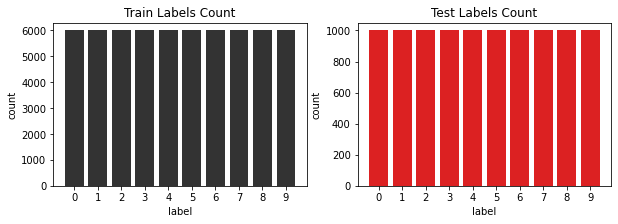

In [51]:
#Label count
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.countplot(train['label'], palette=['#333333' for i in range(10)])
plt.title('Train Labels Count')
plt.plot()

plt.subplot(1, 2, 2)
sns.countplot(test['label'], palette=['#fb0203' for i in range(10)])
plt.title('Test Labels Count')
plt.plot()

In [52]:
#Convert the dataframes into numpy arrays of float32
#Then I can pass them to the tensorflow and keras
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

#Split the train data into X & Y (X axis - Image Data, Y axis - Labels)
#Rescaling image data
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [53]:
#View x_train Data
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
#View y_train Data
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

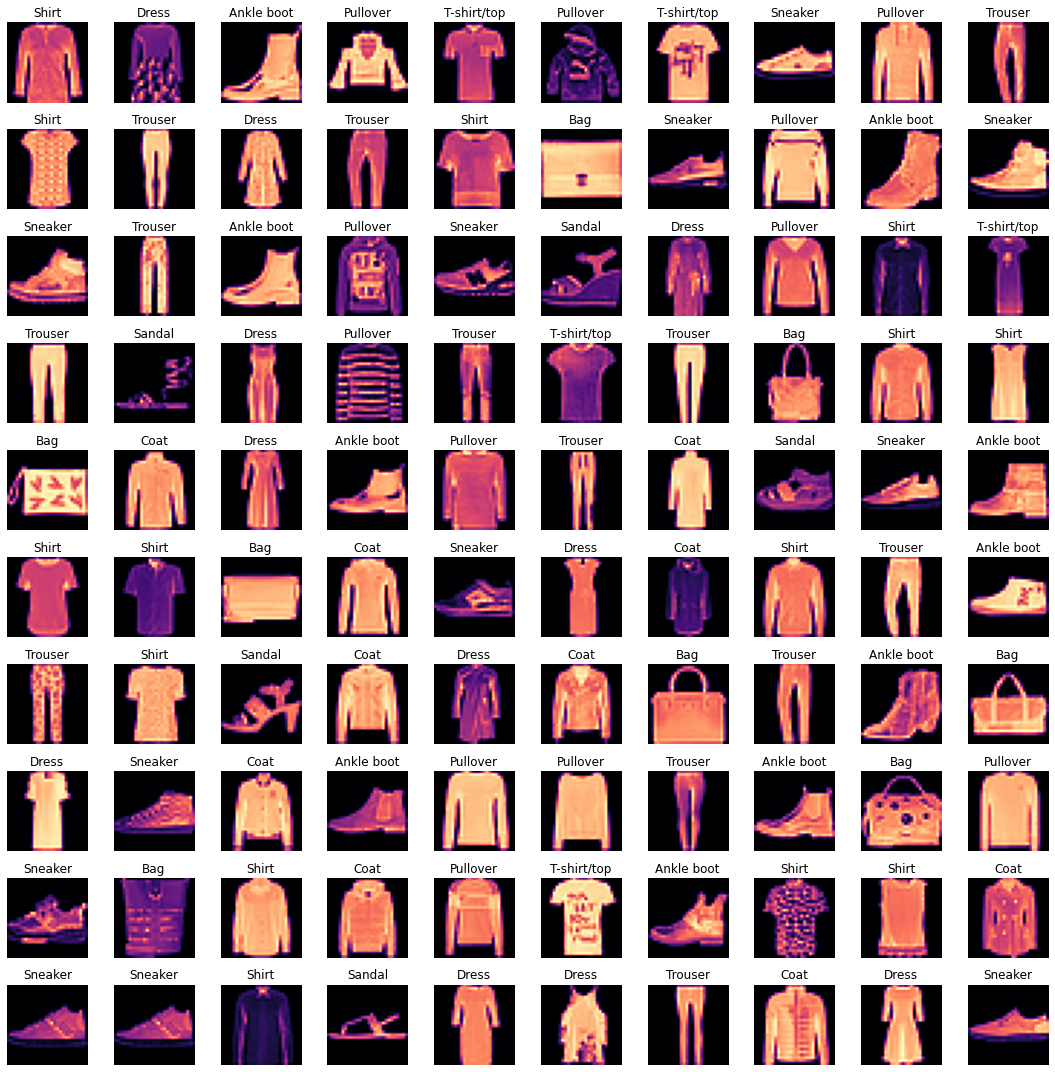

In [55]:
#Data Visualization
#Class Names from Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#First few train images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(x_train))
    img = x_train[data_idx].reshape([28, 28])
    label = labels[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

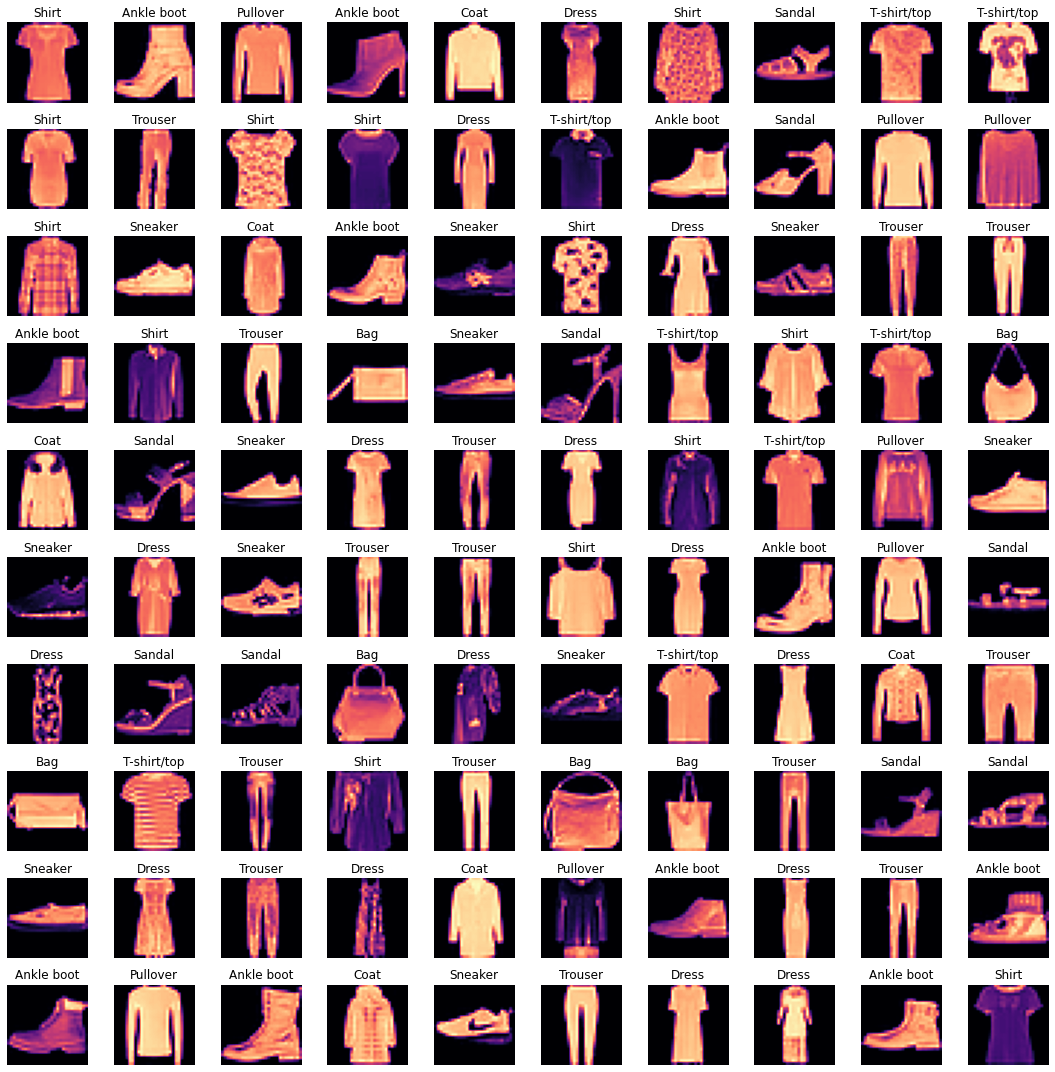

In [56]:
#First few test images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(x_test))
    img = x_test[data_idx].reshape([28, 28])
    label = labels[y_test[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [78]:
#Split into image and labels and convert to numpy array
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

In [79]:
#Reshaping images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [80]:
#Fix data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [81]:
#Normalizing images
X_train = X_train/255.0
X_test = X_test/255.0

In [82]:
input_size = 784
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

In [83]:
#One hot encoding targets
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [84]:
#Train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.3)

In [85]:
#Model Parameters
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 100
VERBOSE = 2

In [86]:
#Define Model
model = Sequential(name="sequential")

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [87]:
#Model Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
#View Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 50)                270450    
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                        

In [89]:
#Model Fitting
history = model.fit(X_train, y_train_enc, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, validation_split=0.3)

Epoch 1/100
230/230 - 18s - loss: 0.6232 - accuracy: 0.7821 - val_loss: 0.4300 - val_accuracy: 0.8503 - 18s/epoch - 78ms/step
Epoch 2/100
230/230 - 16s - loss: 0.4106 - accuracy: 0.8567 - val_loss: 0.3774 - val_accuracy: 0.8644 - 16s/epoch - 67ms/step
Epoch 3/100
230/230 - 15s - loss: 0.3623 - accuracy: 0.8718 - val_loss: 0.3476 - val_accuracy: 0.8780 - 15s/epoch - 67ms/step
Epoch 4/100
230/230 - 17s - loss: 0.3290 - accuracy: 0.8837 - val_loss: 0.3264 - val_accuracy: 0.8828 - 17s/epoch - 74ms/step
Epoch 5/100
230/230 - 14s - loss: 0.3045 - accuracy: 0.8935 - val_loss: 0.3064 - val_accuracy: 0.8891 - 14s/epoch - 63ms/step
Epoch 6/100
230/230 - 17s - loss: 0.2876 - accuracy: 0.8970 - val_loss: 0.2978 - val_accuracy: 0.8913 - 17s/epoch - 74ms/step
Epoch 7/100
230/230 - 14s - loss: 0.2760 - accuracy: 0.9016 - val_loss: 0.2843 - val_accuracy: 0.8975 - 14s/epoch - 63ms/step
Epoch 8/100
230/230 - 14s - loss: 0.2598 - accuracy: 0.9067 - val_loss: 0.2805 - val_accuracy: 0.9000 - 14s/epoch - 63

In [90]:
#Model loss and accuracy on validation set
score = model.evaluate(X_test, y_test_enc)
print('Test Loss: {:.2f}%'.format(score[0]*100))
print('Test Accuracy: {:.2f}%'.format(score[1]*100))

313/313 [==============================] - 3s 11ms/step - loss: 0.5118 - accuracy: 0.9122
Test Loss: 51.18%
Test Accuracy: 91.22%


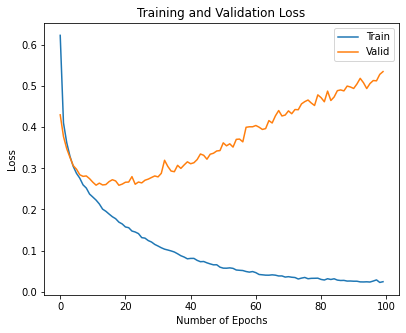

In [91]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [92]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.82      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.90      0.87      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.87      0.88      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.74      0.76      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



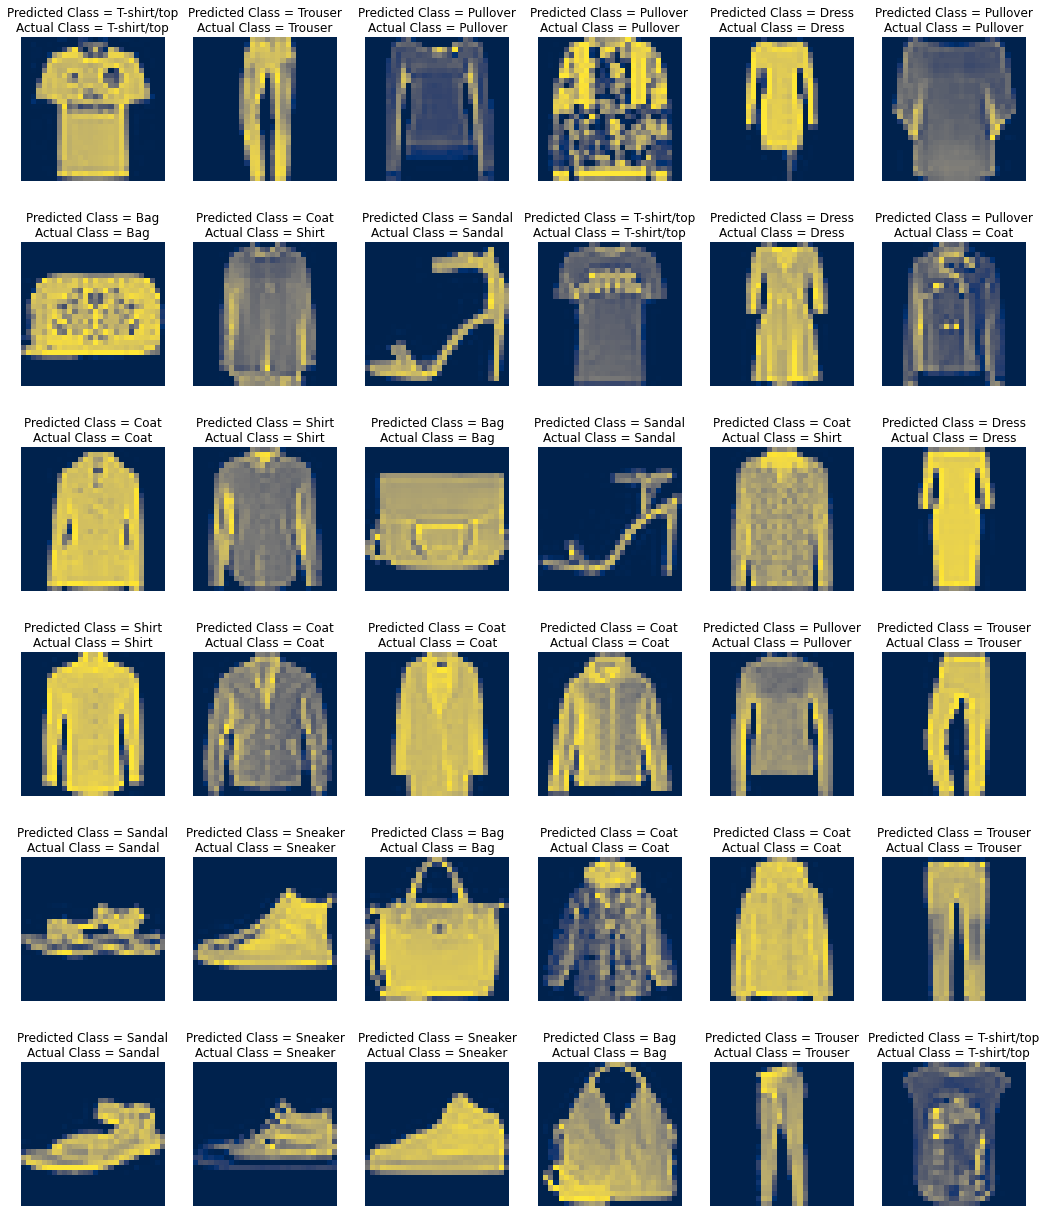

In [94]:
# predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 22))
for ind, row in enumerate(X_test[:36]):
    plt.subplot(6, 6, ind+1)
    plt.title('Predicted Class = ' + labels[y_pred[ind]] + '\n' + 'Actual Class = ' + labels[y_test[ind]])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

# **Autoencoder using the Fashion MNIST Dataset**

In [95]:
#(b) Start the Autoencorder Procedure
x_train = train[list(train.columns)[1:]].values
x_test = test[list(test.columns)[1:]].values

In [96]:
#Define variables
input_size = 784

# Normalizing all values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [97]:
# Reshaping(Flatten the images into vectors of size 784)
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

In [98]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [99]:
#Define variables
layer_2_size = 2400

input_img = Input(shape=(input_size,))

# Encoded representation of the input
encode_layer1 = Dense(2900, activation='relu')(input_img)
encode_layer2 = Dense(layer_2_size, activation='relu')(encode_layer1)
encode_layer3 = Dense(1900, activation='relu')(encode_layer2)

# Latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

# Dencoded representation of the output
decode_layer1 = Dense(1900, activation='relu')(latent_view)
decode_layer2 = Dense(layer_2_size, activation='relu')(decode_layer1)
decode_layer3 = Dense(2900, activation='relu')(decode_layer2)

# Map input to its reconstruction
output_img  = Dense(input_size)(decode_layer3)

autoencoder = Model(input_img, output_img)

In [100]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 2900)              2276500   
                                                                 
 dense_7 (Dense)             (None, 2400)              6962400   
                                                                 
 dense_8 (Dense)             (None, 1900)              4561900   
                                                                 
 dense_9 (Dense)             (None, 10)                19010     
                                                                 
 dense_10 (Dense)            (None, 1900)              20900     
                                                                 
 dense_11 (Dense)            (None, 2400)              456240

In [102]:
#Using Adam optimizer and Mean squared error loss function
autoencoder.compile(optimizer='adam', loss='mse')

#Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=2048, validation_data=(x_test, x_test))

Epoch 1/50
30/30 [==============================] - 182s 6s/step - loss: 0.0769 - val_loss: 0.0629
Epoch 2/50
30/30 [==============================] - 177s 6s/step - loss: 0.0569 - val_loss: 0.0496
Epoch 3/50
30/30 [==============================] - 177s 6s/step - loss: 0.0419 - val_loss: 0.0377
Epoch 4/50
30/30 [==============================] - 179s 6s/step - loss: 0.0349 - val_loss: 0.0323
Epoch 5/50
30/30 [==============================] - 176s 6s/step - loss: 0.0303 - val_loss: 0.0287
Epoch 6/50
30/30 [==============================] - 180s 6s/step - loss: 0.0285 - val_loss: 0.0270
Epoch 7/50
30/30 [==============================] - 176s 6s/step - loss: 0.0260 - val_loss: 0.0263
Epoch 8/50
30/30 [==============================] - 175s 6s/step - loss: 0.0250 - val_loss: 0.0243
Epoch 9/50
30/30 [==============================] - 176s 6s/step - loss: 0.0243 - val_loss: 0.0234
Epoch 10/50
30/30 [==============================] - 176s 6s/step - loss: 0.0231 - val_loss: 0.0226
Epoch 11/

In [103]:
reconstructed = autoencoder.predict(x_test)

313/313 [==============================] - 18s 56ms/step


In [104]:
from PIL import Image 

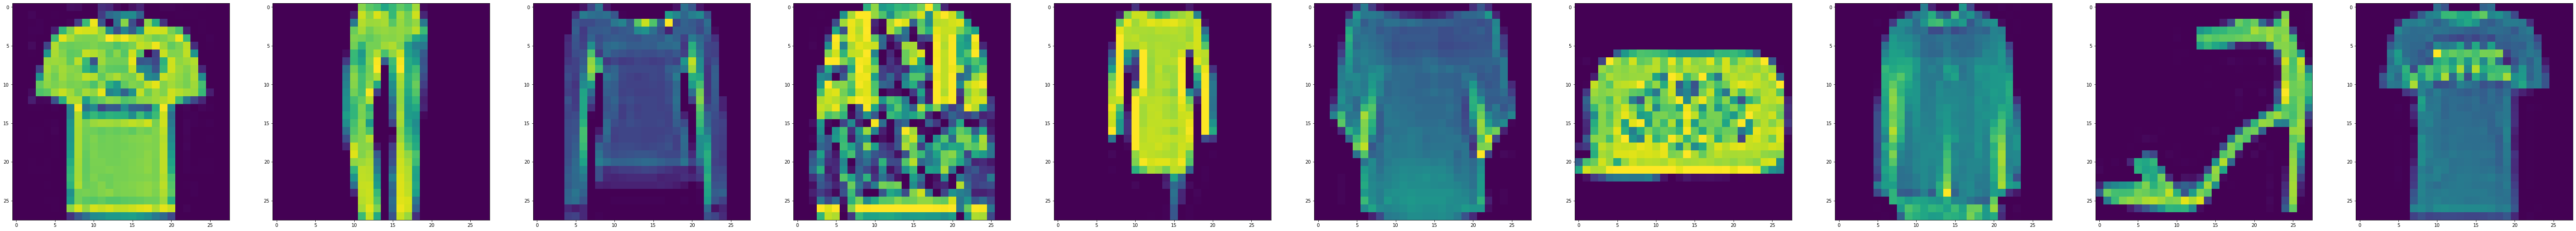

In [105]:
#Display Original
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(x_test[i].reshape(28, 28))
plt.show()

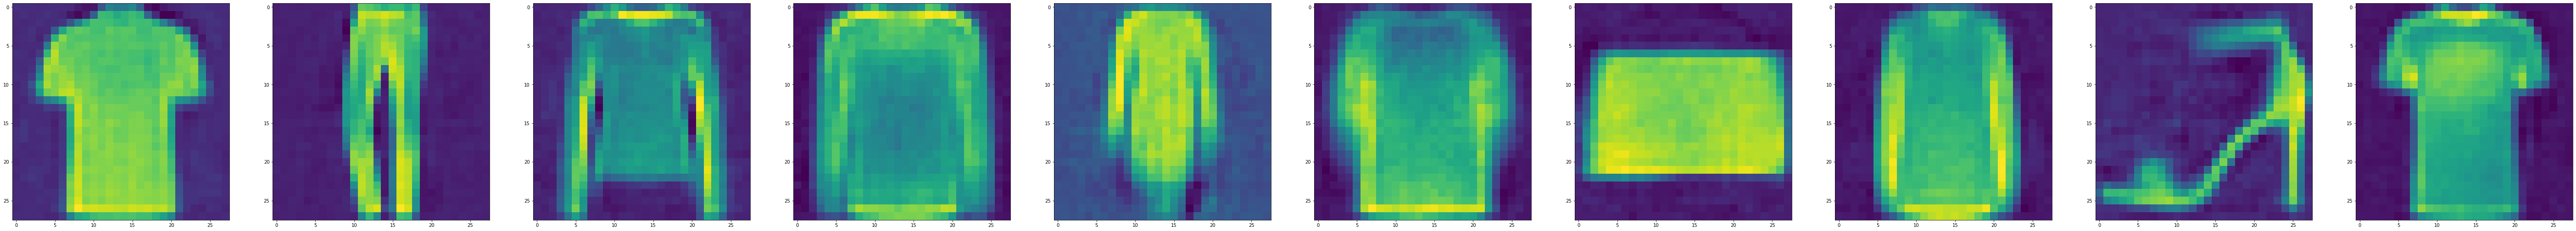

In [106]:
#Display Reconstructed Images
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(reconstructed[i].reshape(28, 28))
plt.show()